**EDA**

The house in King County has a very large range of price, making it difficult to set the best pricing for real estate developer


**Conclusion**

- total bedrooms --> correlated to price
- total bathrooms	--> correlated to price
- sqft_living	--> highly correlated to price
- sqft_lot --> slightly correlated to price
- floors --> correlated to price
- waterfront --> correlated to price
- view --> correlated to price
- condition --> slightly correlated to price
- grade --> highly correlated to price
- sqft_above	--> highly correlated to price
- sqft_basement --> correlated to price
- yr_built --> slightly correlated to price
- yr_renovated --> slightly correlated	to price
- zipcode	--> correlated to price after data pre-processed --> one hot encoding



- Median bedrooms :  3.0
- Median bathrooms :  2.25
- Median sqft_living :  1910.0
- Median sqft_lot :  7618.0
- Median floors :  1.5
- Median grade :  7.0
- Median price :  450000.0

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
df.zipcode.nunique()

70

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
df.describe(include='O')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [43]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


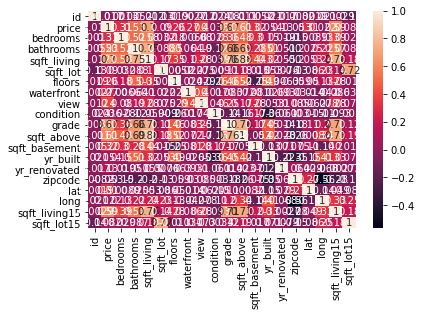

In [44]:
sns.heatmap(df.corr(), annot=True)

**Drop Unecessary Data**

- id are dropped, not needed
- date are dropped, not needed
- lat-long are dropped, use zipcode instead
- sqft-living15,sqft-lot15 are dropped, neighbors housing size might cause bias in setting price

In [45]:
df.drop(columns=['id'], inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Handling Outliers**

**Outliers "Tidak" perlu di drop**

AxesSubplot(0.125,0.125;0.775x0.755)


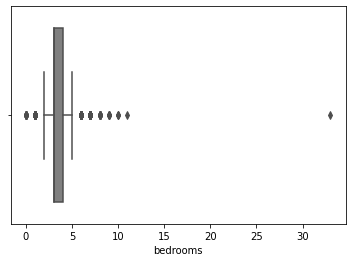

In [79]:
print(sns.boxplot(df['bedrooms'], color='grey'))

AxesSubplot(0.125,0.125;0.775x0.755)


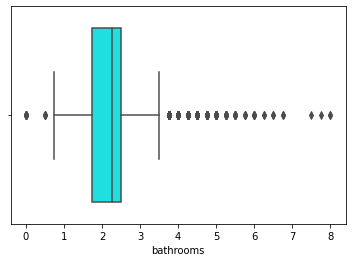

In [81]:
print(sns.boxplot(df['bathrooms'], color='cyan'))

AxesSubplot(0.125,0.125;0.775x0.755)


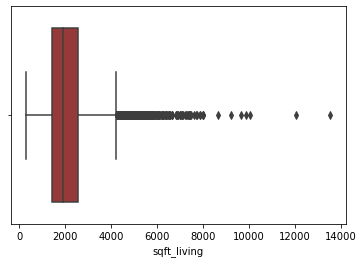

In [84]:
print(sns.boxplot(df['sqft_living'], color='brown'))

AxesSubplot(0.125,0.125;0.775x0.755)


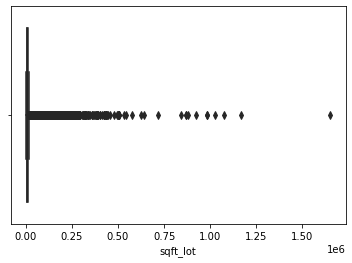

In [85]:
print(sns.boxplot(df['sqft_lot'], color='green'))

AxesSubplot(0.125,0.125;0.775x0.755)


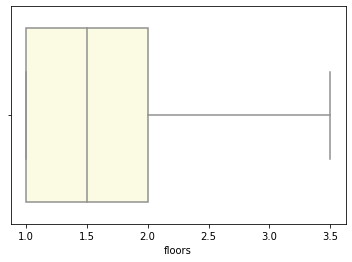

In [87]:
print(sns.boxplot(df['floors'], color='lightyellow'))

AxesSubplot(0.125,0.125;0.775x0.755)


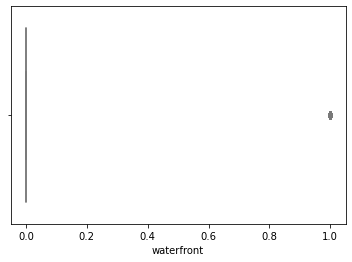

In [89]:
print(sns.boxplot(df['waterfront'], color='lightblue'))

AxesSubplot(0.125,0.125;0.775x0.755)


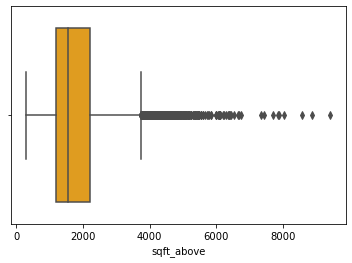

In [91]:
print(sns.boxplot(df['sqft_above'], color='orange'))

AxesSubplot(0.125,0.125;0.775x0.755)


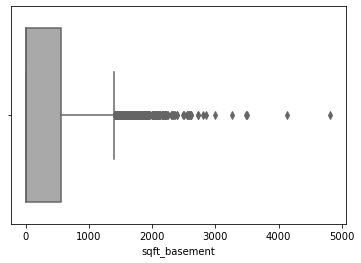

In [93]:
print(sns.boxplot(df['sqft_basement'], color='darkgrey'))

AxesSubplot(0.125,0.125;0.775x0.755)


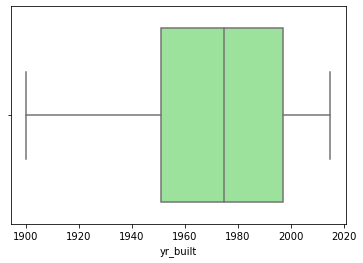

In [98]:
print(sns.boxplot(df['yr_built'], color='lightgreen'))

AxesSubplot(0.125,0.125;0.775x0.755)


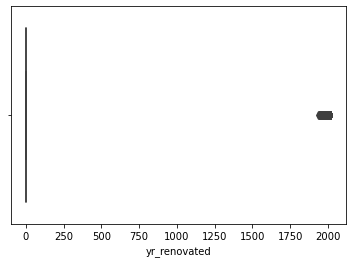

In [56]:
print(sns.boxplot(df['yr_renovated']))

**Visualized Correlation**

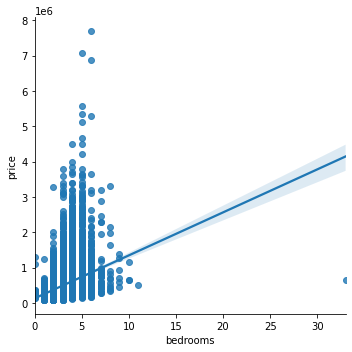

In [97]:
sns.lmplot(x='bedrooms',y='price',data=df)

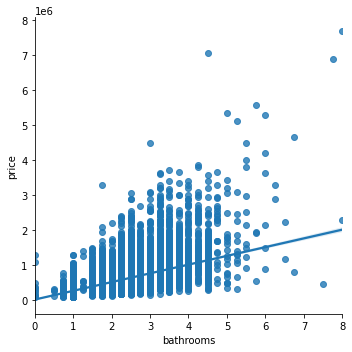

In [96]:
sns.lmplot(x='bathrooms',y='price',data=df)

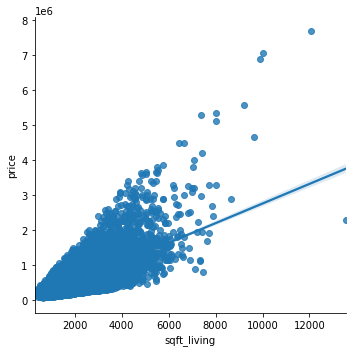

In [59]:
sns.lmplot(x='sqft_living',y='price',data=df)

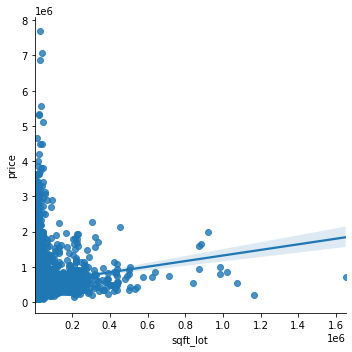

In [60]:
sns.lmplot(x='sqft_lot',y='price',data=df)

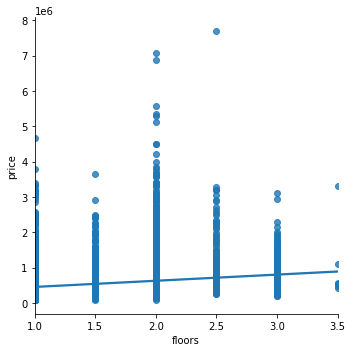

In [61]:
sns.lmplot(x='floors',y='price',data=df)

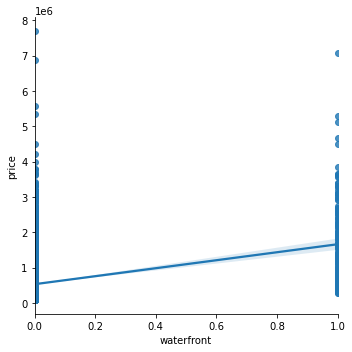

In [62]:
sns.lmplot(x='waterfront',y='price',data=df)

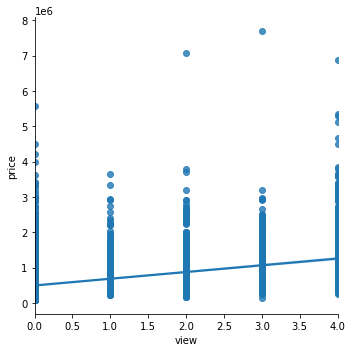

In [63]:
sns.lmplot(x='view',y='price',data=df)

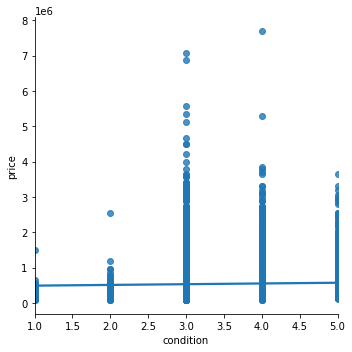

In [64]:
sns.lmplot(x='condition',y='price',data=df)

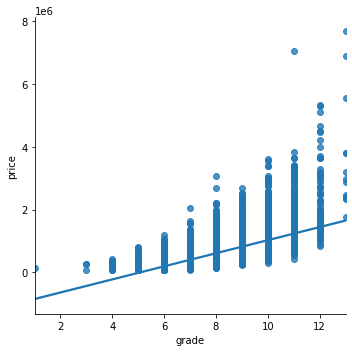

In [65]:
sns.lmplot(x='grade',y='price',data=df)

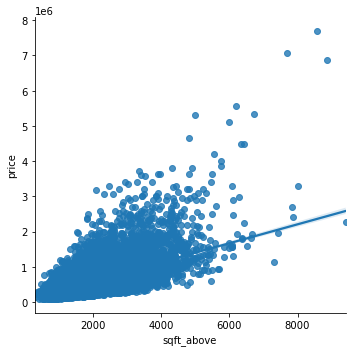

In [66]:
sns.lmplot(x='sqft_above',y='price',data=df)

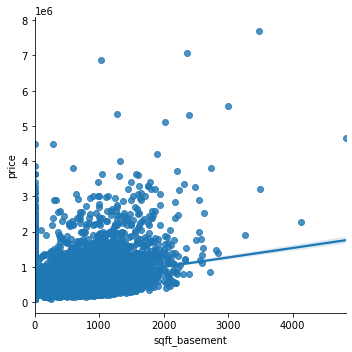

In [67]:
sns.lmplot(x='sqft_basement',y='price',data=df)

sns.lmplot(x='yr_built',y='sqft_lot',data=df) see wether the older house has bigger lot. --> not significant

sns.lmplot(x='yr_built',y='price',data=df)

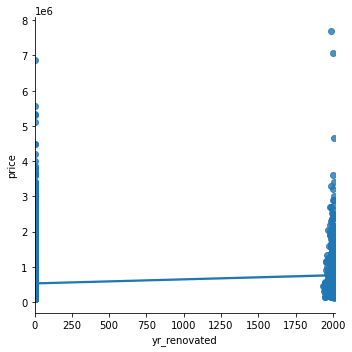

In [68]:
sns.lmplot(x='yr_renovated',y='price',data=df)

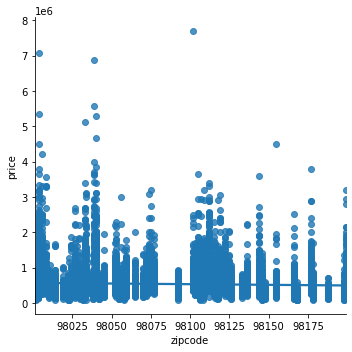

In [69]:
sns.lmplot(x='zipcode',y='price',data=df)

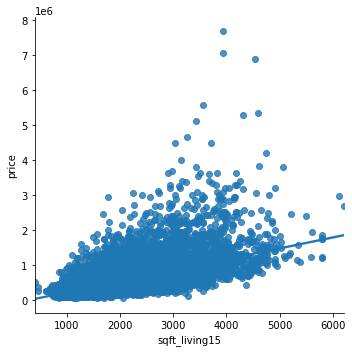

In [70]:
sns.lmplot(x='sqft_living15',y='price',data=df)

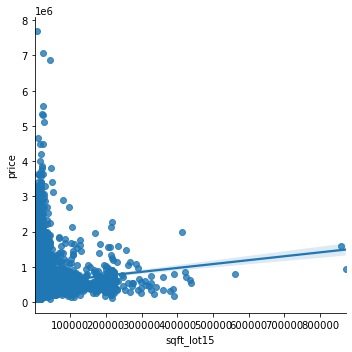

In [71]:
sns.lmplot(x='sqft_lot15',y='price',data=df)

**Checking Price Range**

In [72]:
print('Harga Minimum' ,df.price.min())
print('Harga Maximum' ,df.price.max())

Harga Minimum 75000.0
Harga Maximum 7700000.0


**Fixing Year of Last Renovated Data**

In [73]:
df.loc[df['yr_renovated']==0, 'yr_renovated'] = df['yr_built']

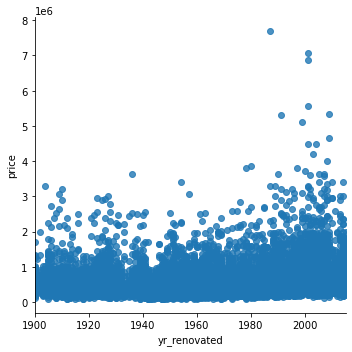

In [74]:
sns.lmplot(x='yr_renovated',y='price',data=df)

**Checking Price per Square distribution**

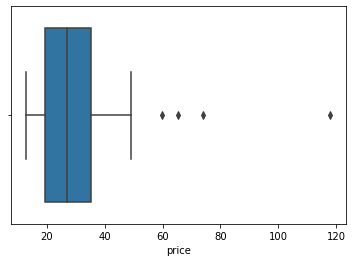

In [75]:
prc = (df[['zipcode','price','sqft_lot']].groupby(['zipcode']).mean()).sort_values('sqft_lot', ascending=False)
prc_per_sqr = prc.price/prc.sqft_lot.mean()
sns.boxplot(prc_per_sqr)

In [76]:
prc_per_sqr.sort_values(ascending=False)

zipcode
98039    117.975385
98004     74.037550
98040     65.208422
98112     59.817441
98102     49.211315
            ...    
98148     15.556835
98001     15.332750
98032     13.721503
98168     13.122626
98002     12.792588
Name: price, Length: 70, dtype: float64

In [77]:
df.groupby(df['condition']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,,
1,334431.666667,2.466667,1.175000,1216.000000,22131.066667,1.150000,0.033333,0.300000,5.800000,1144.333333,71.666667,1931.533333,1934.266667,98092.500000,47.577257,-122.260567,1802.666667,9940.233333
2,327287.145349,2.831395,1.449128,1410.058140,32502.901163,1.156977,0.005814,0.075581,6.505814,1243.604651,166.453488,1948.941860,1949.738372,98092.046512,47.525012,-122.237233,1585.447674,19548.168605
3,542012.578148,3.374171,2.222632,2149.042050,14758.281733,1.620554,0.006486,0.213385,7.826741,1906.819756,242.222293,1979.463117,1982.528401,98078.639798,47.564361,-122.202987,2043.879481,12513.670230
4,521200.390033,3.356929,1.900423,1950.991724,16019.821447,1.261138,0.008804,0.263427,7.382462,1590.753830,360.237894,1958.340201,1959.461349,98072.490579,47.546711,-122.227555,1901.164642,13701.466984
5,612418.089359,3.460317,2.024397,2022.911229,13052.582011,1.271605,0.011758,0.324515,7.320988,1537.788948,485.122281,1946.448560,1947.543798,98088.675485,47.572296,-122.255102,1842.560259,11119.460317


**Checking Median Data**

In [78]:
print('Median bedrooms : ' , df['bedrooms'].median())
print('Median bathrooms : ' , df['bathrooms'].median())
print('Median sqft_living : ' , df['sqft_living'].median())
print('Median sqft_lot : ' , df['sqft_lot'].median())
print('Median floors : ' , df['floors'].median())
print('Median grade : ' , df['grade'].median())
print('Median price : ' , df['price'].median())

Median bedrooms :  3.0
Median bathrooms :  2.25
Median sqft_living :  1910.0
Median sqft_lot :  7618.0
Median floors :  1.5
Median grade :  7.0
Median price :  450000.0
